<a href="https://colab.research.google.com/github/sachinbb7/Machine-Learning-Projects/blob/main/LoanTap_Logistic_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Tap :**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

# **Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# **My View :**


* We must monitor the user's credit line history and repayment track record.

*  Examining the duration and overall liability of past loans is essential.


* Given our emphasis on salaried individuals, it is crucial to factor in the individual's salary.

**Data dictionary:**

* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the * borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 43.8MB/s] 


In [ ]:
df = pd.read_csv("logistic_regression.csv")

## **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [ ]:
df['term']=df.term.map({' 36 months':36, ' 60 months':60})

In [ ]:
df['zip_code']= df['address'].apply(lambda x: x[-5::])

In [ ]:
df['term'].value_counts(normalize=True)*100

36    76.258112
60    23.741888
Name: term, dtype: float64

In [ ]:
df['zip_code'].value_counts(normalize=True)*100

70466    14.389061
30723    14.278211
22690    14.273414
48052    14.119385
00813    11.570841
29597    11.481706
05113    11.464283
11650     2.834634
93700     2.815696
86630     2.772770
Name: zip_code, dtype: float64

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [ ]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [ ]:
df["title"]= df["title"].str.lower()

In [ ]:
df["title"].head()

0                   vacation
1         debt consolidation
2    credit card refinancing
3    credit card refinancing
4      credit card refinance
Name: title, dtype: object

In [ ]:
df.dtypes

loan_amnt                      float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
application_type                object
mort_acc                       float64
pub_rec_bankruptcies     

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
zip_code                    0
dtype: int64

In [ ]:
df.describe(include=[np.number])

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
num_vars = df.select_dtypes(['float64','int64']).columns.tolist()

In [ ]:
cat_vars = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'zip_code', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

In [ ]:
for col in cat_vars:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in home_ownership: 4
No. of unique values in verification_status: 3
No. of unique values in zip_code: 10
No. of unique values in pub_rec: 20
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in pub_rec_bankruptcies: 9


In [ ]:
for col in num_vars:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in loan_amnt: 1397
No. of unique values in term: 2
No. of unique values in int_rate: 566
No. of unique values in installment: 55706
No. of unique values in annual_inc: 27197
No. of unique values in dti: 4262
No. of unique values in open_acc: 61
No. of unique values in pub_rec: 20
No. of unique values in revol_bal: 55622
No. of unique values in revol_util: 1226
No. of unique values in total_acc: 118
No. of unique values in mort_acc: 33
No. of unique values in pub_rec_bankruptcies: 9


## **Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

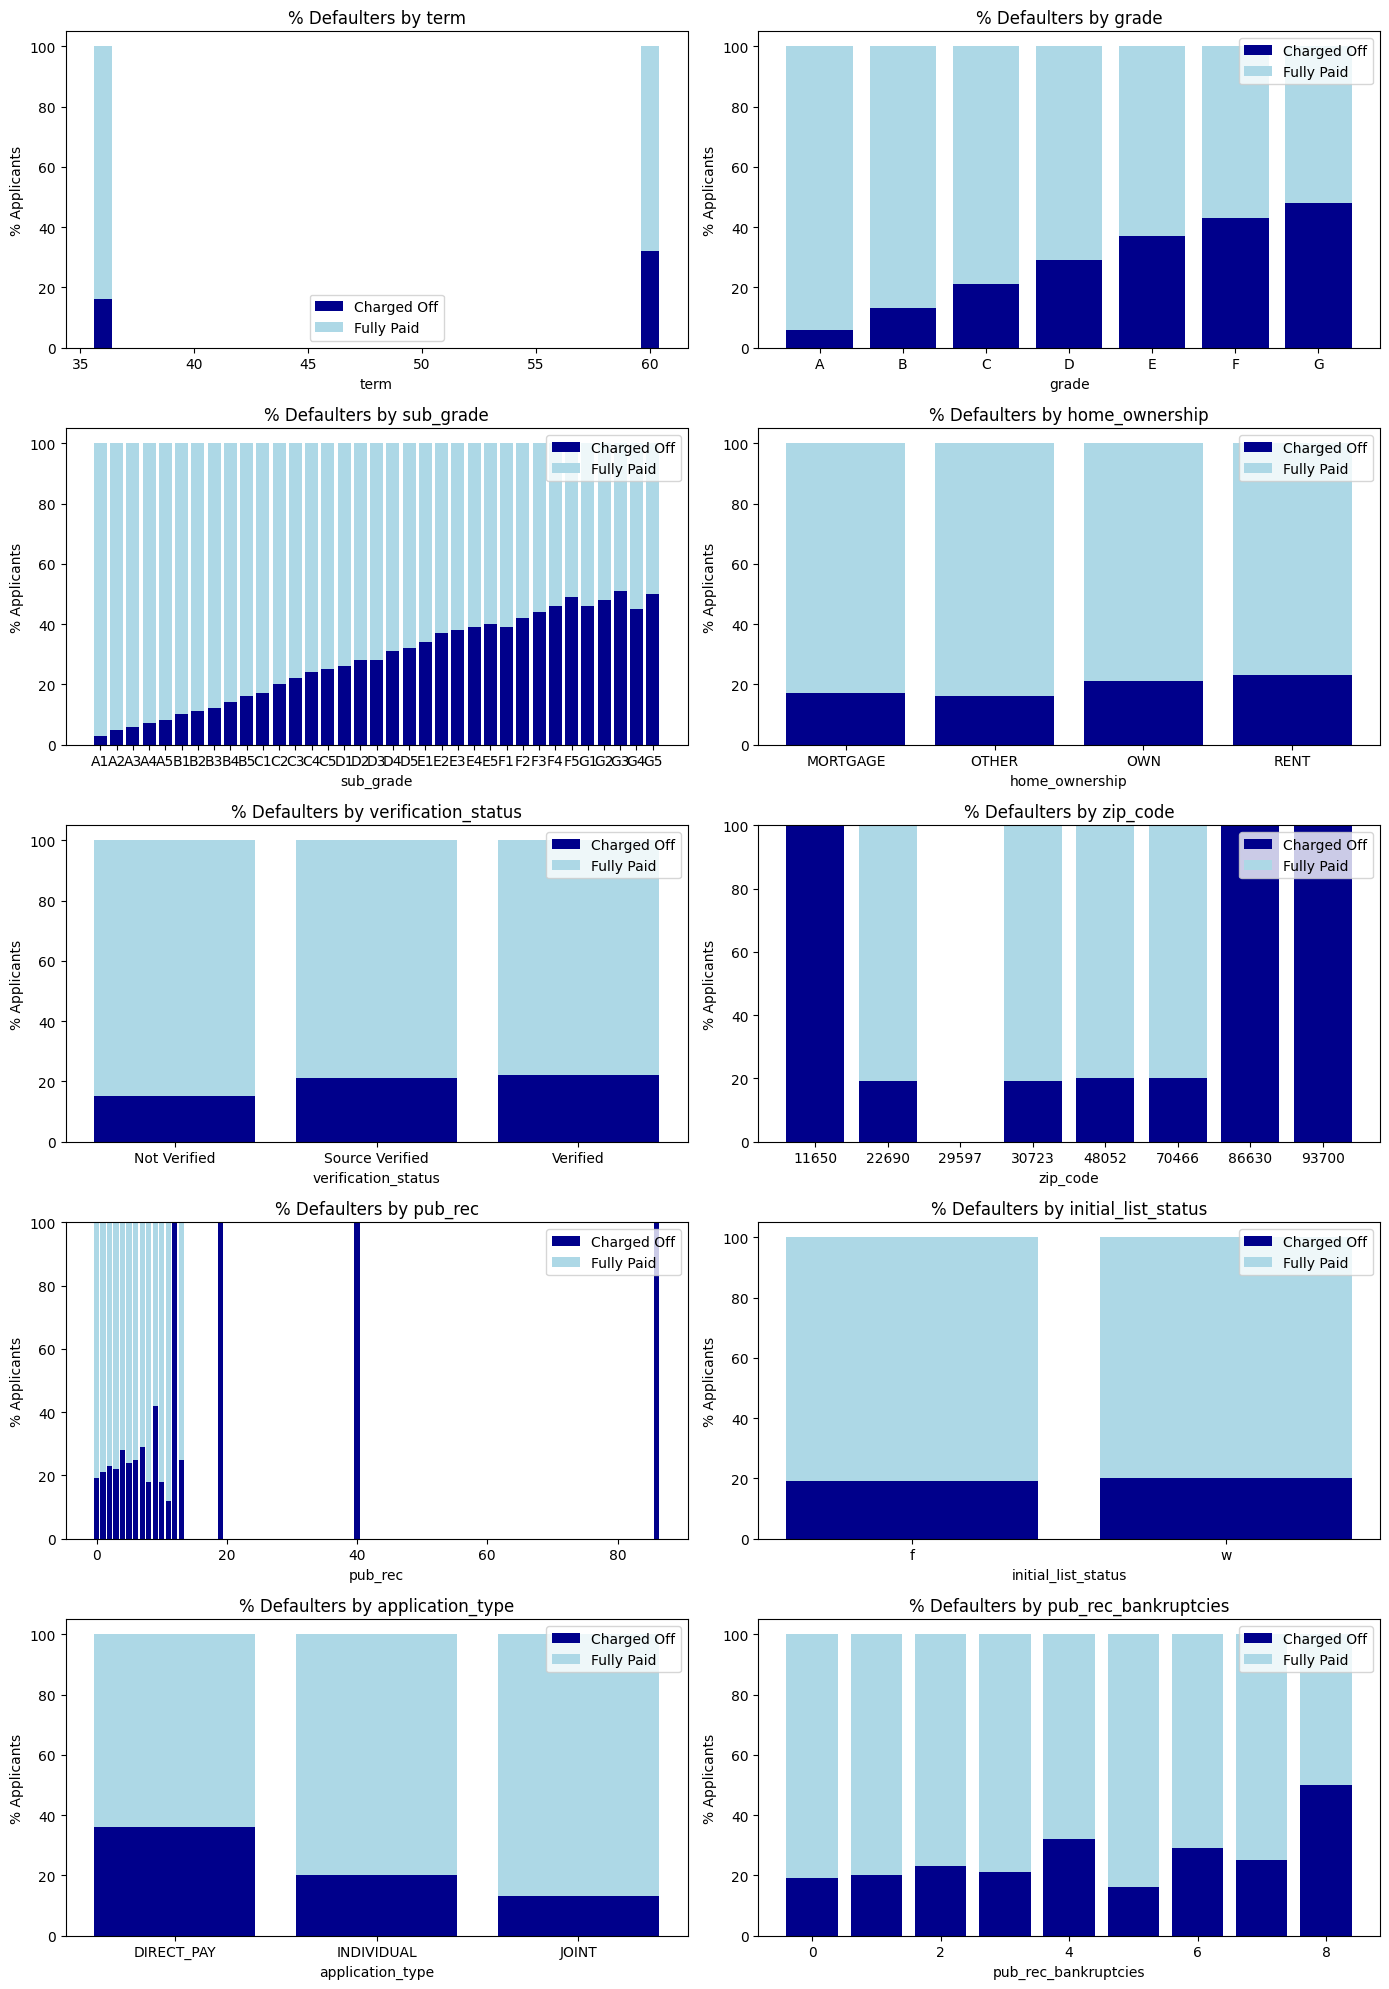

In [ ]:


plt.figure(figsize=(14,20))
i=1
for col in cat_vars:
  ax=plt.subplot(5,2,i)

  data = df.pivot_table(index=col, columns=df['loan_status'], aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#00008b')
  plt.bar(data[col],data['Fully Paid'], color='#add8e6', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1

plt.tight_layout()
plt.show()

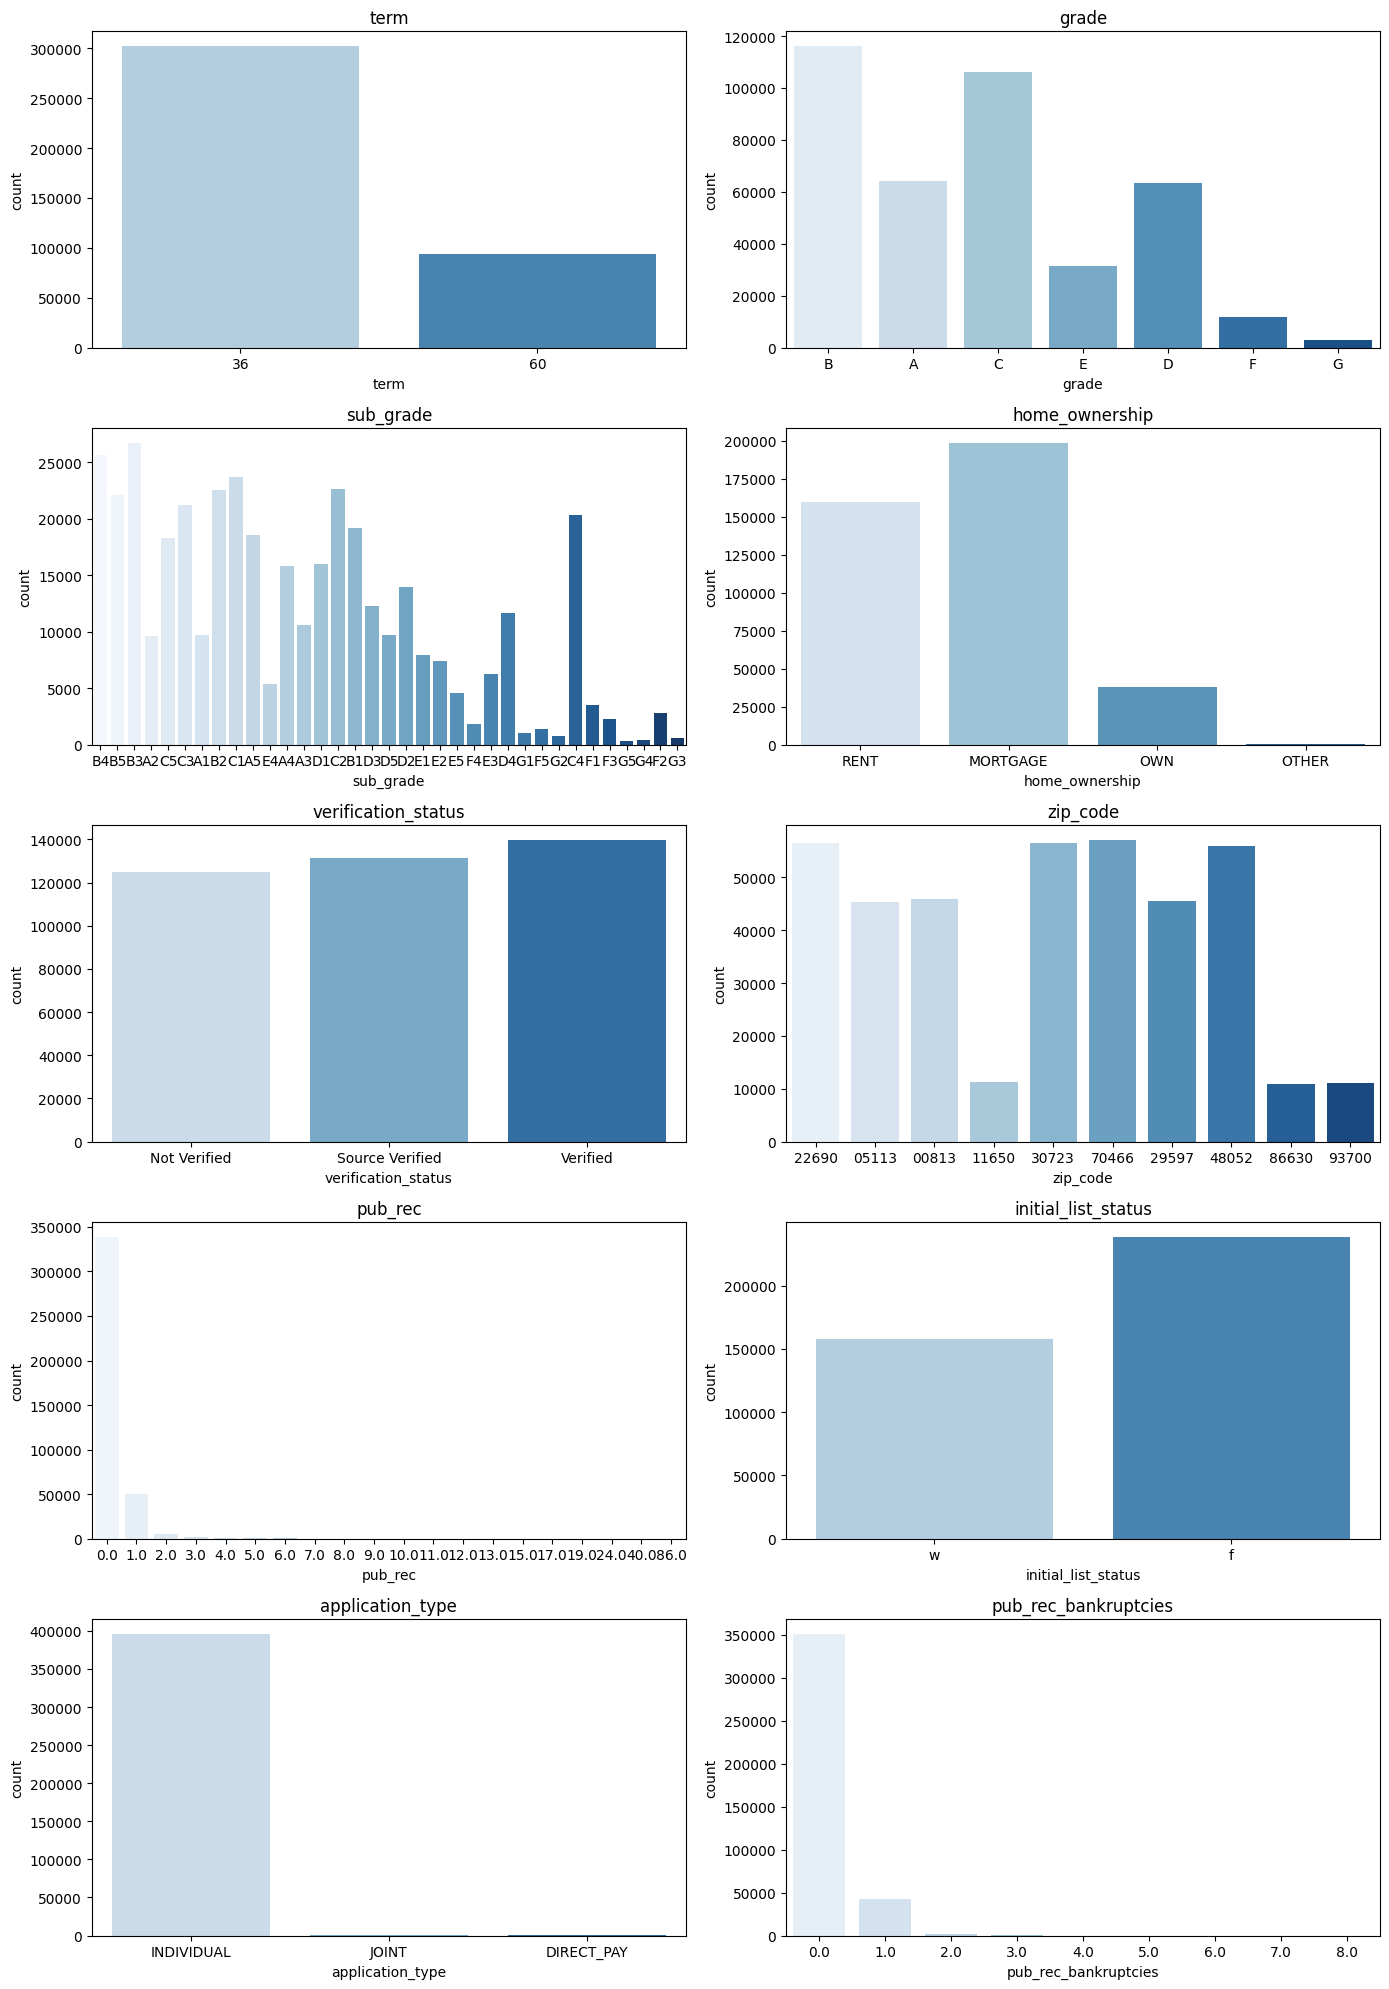

In [ ]:
plt.figure(figsize=(14,20))
i=1
for col in cat_vars:
  ax=plt.subplot(5,2,i)
  sns.countplot(x=df[col], palette='Blues')
  plt.title(f'{col}')
  i += 1

plt.tight_layout()
plt.show()

# **Bivariate & Multi-variate Analysis**

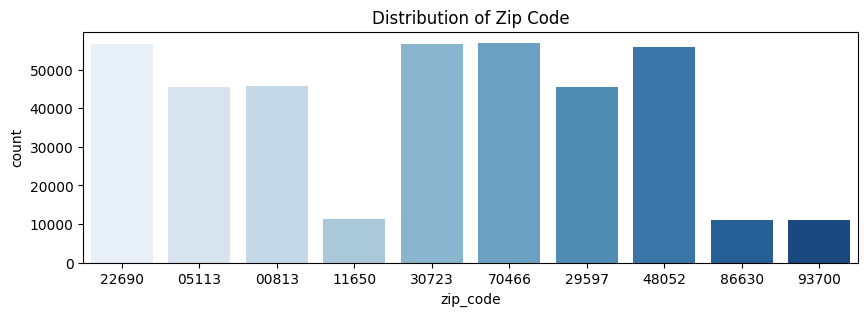

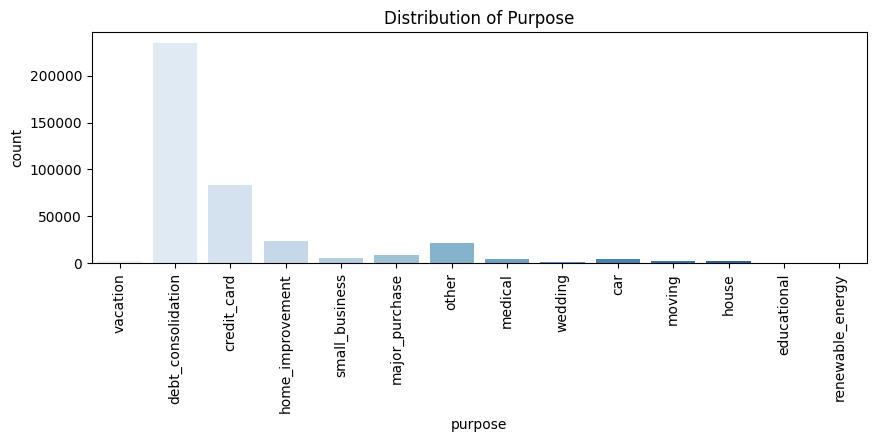

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['zip_code'], palette='Blues')
plt.title('Distribution of Zip Code')

plt.figure(figsize=(10,3))
sns.countplot(x=df['purpose'], palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')

plt.show()

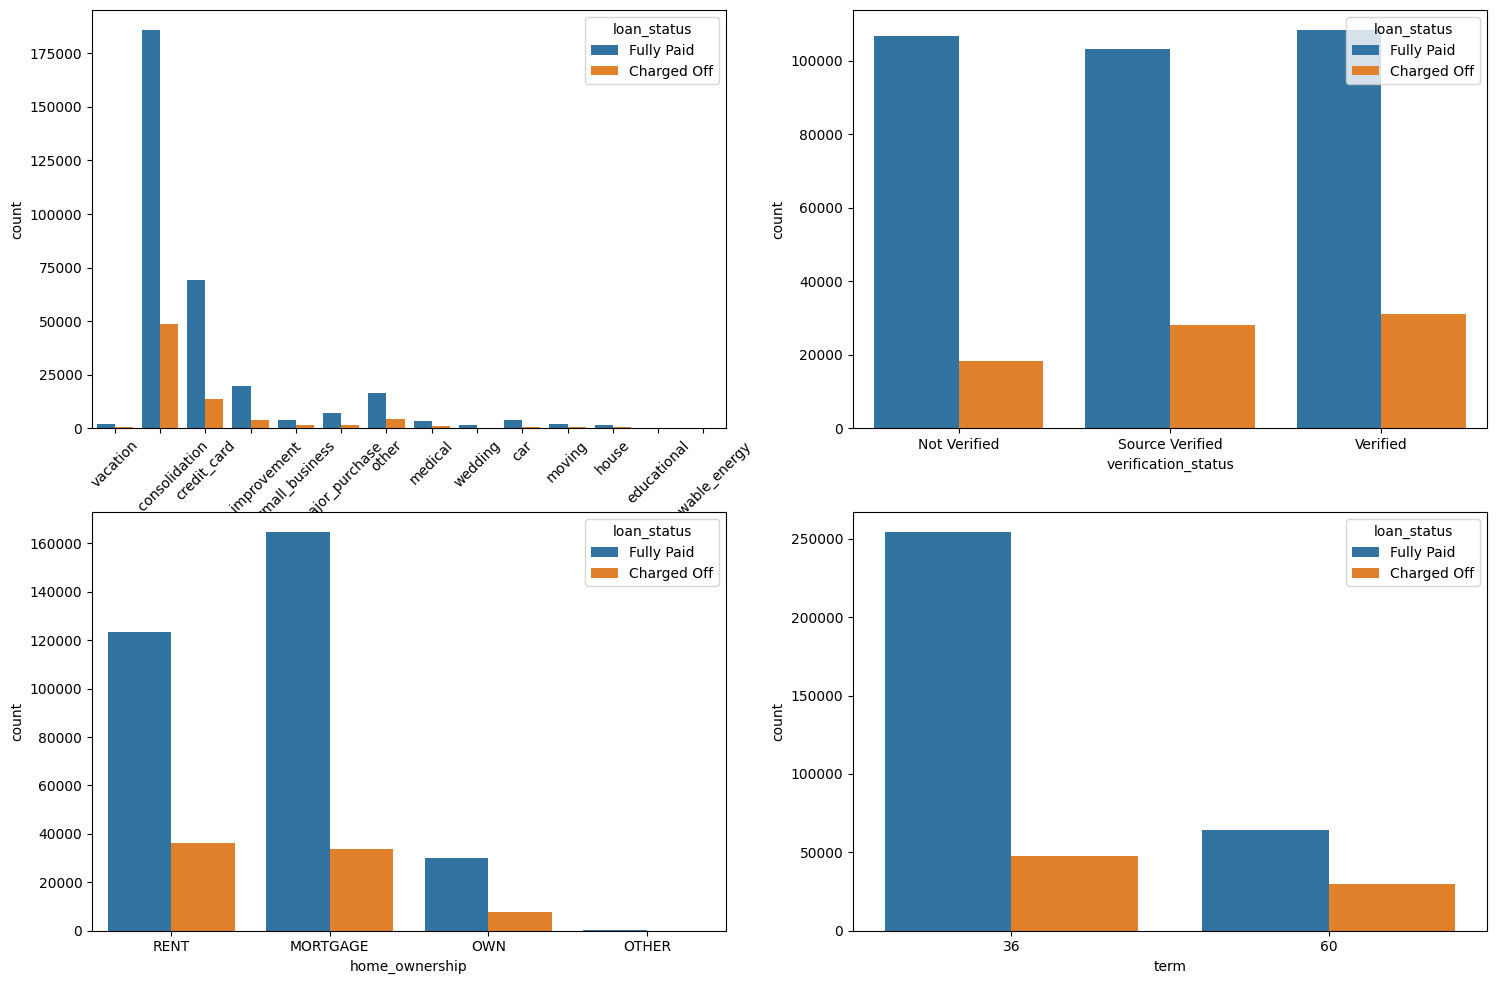

In [ ]:
plt.figure(figsize=(18,25))

plt.subplot(4,2,1)
sns.countplot(x='purpose',data=df,hue='loan_status')
plt.xticks(rotation=45)

plt.subplot(4,2,2)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='term',data=df,hue='loan_status')

plt.show()



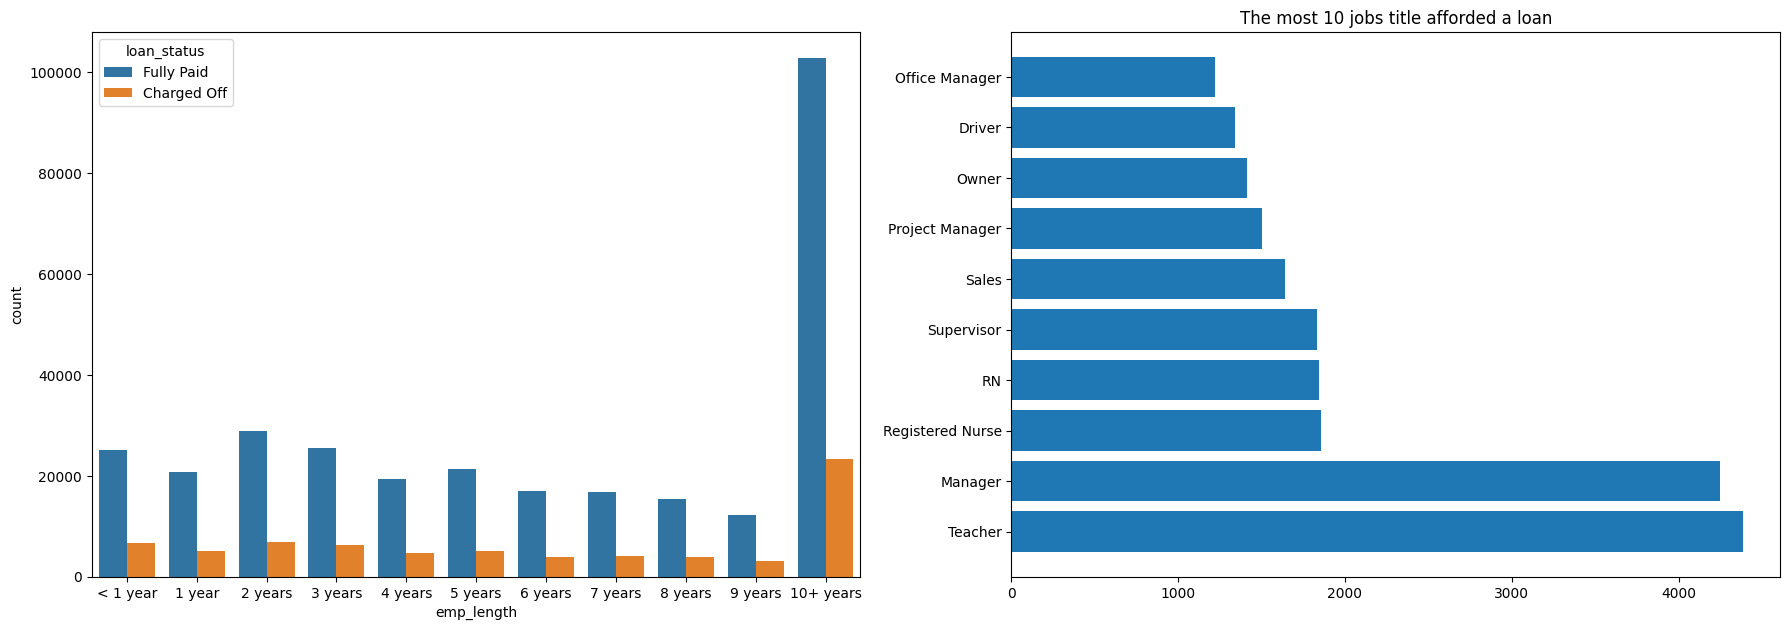

In [ ]:
plt.figure(figsize=(18,12))

order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]

plt.subplot(2,2,1)
data=sns.countplot(x='emp_length',data=df,hue='loan_status',order = order)


plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:10].index,df.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title afforded a loan")
plt.tight_layout()

plt.show()

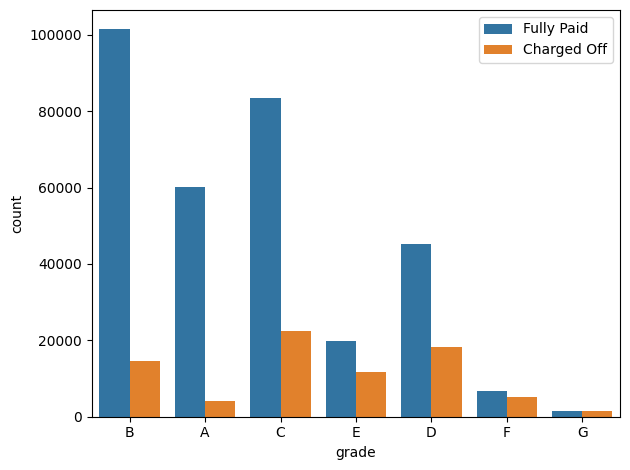

In [ ]:
df2= pd.read_csv("logistic_regression.csv")

sns.countplot(x='grade',data=df2,hue='loan_status')

plt.tight_layout()
plt.legend(["Fully Paid", "Charged Off"])

plt.show()

**Observations:**


1. **Higher Default Rates for Longer Terms:**
   - The percentage of defaulters is notably elevated for longer-term loans, particularly those with a 60-month duration.

2. **Grade/Sub-Grade Impact on Loan Status:**
   - As anticipated, the grade and sub-grade exhibit the most substantial influence on loan_status, with the highest grade corresponding to the maximum number of defaulters.

3. **Zip Codes with 100% Defaulters:**
   - Specific zip codes, such as 11650, 86630, and 93700, demonstrate a 100% default rate among borrowers.

4. **Irrelevance of Initial List Status and State:**
   - The features "initial_list_status" and "state" exhibit no discernible impact on loan_status and can be excluded from the analysis.

5. **Surprising Lack of Impact from Public Records:**
   - Contrary to expectations, public records do not seem to exert any significant influence on loan_status, representing an unexpected finding.

6. **Differential Default Rates by Application Type:**
   - The "direct pay" application type exhibits a higher default rate when compared to individual or joint applications.

7. **Highest Default Rate for Small Business Purposes:**
   - Loans taken for the purpose of small business demonstrate the highest rate of default, signaling a noteworthy trend.

1. **Impact of Loan Term Duration:**
   - Loans with a longer term, specifically those with a 60-month duration, exhibit a considerably higher percentage of defaulters.

2. **Influence of Grade and Sub-Grade:**
   - The grade and sub-grade variables, as expected, exert a significant impact on loan_status, with the highest grade correlating with the highest number of defaulters.

3. **Zip Codes with Uniform Default Rates:**
   - Zip codes 11650, 86630, and 93700 stand out as having a 100% default rate among borrowers.

4. **Ineffectiveness of Certain Features:**
   - Features such as "initial_list_status" and "state" do not demonstrate any discernible impact on loan_status and can be excluded from further analysis.

5. **Surprising Findings Regarding Public Records:**
   - Public records surprisingly do not appear to have a meaningful impact on loan_status, contrary to initial expectations.

6. **Differential Default Rates Across Application Types:**
   - The "direct pay" application type shows a higher default rate in comparison to individual or joint applications.

7. **Default Trends for Small Business Loans:**
   - Loans pursued for small business purposes exhibit the highest default rate, pointing to a noteworthy pattern in loan performance.

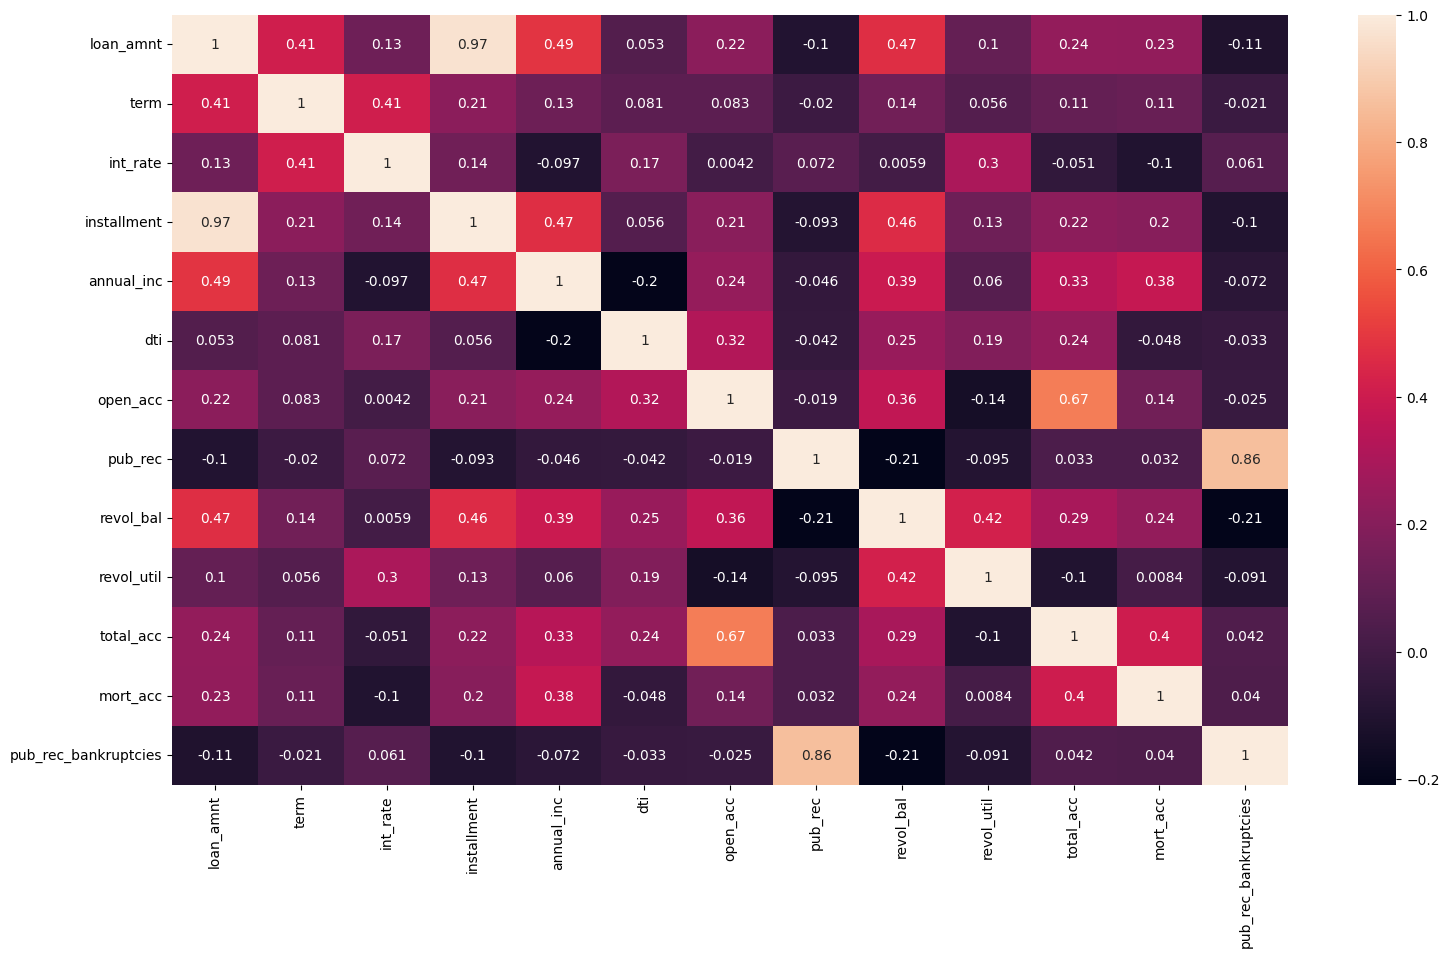

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot = True)

plt.show()

**Observation:**

* loan_amnt and installment are perfectly correlated
* total_acc is highly correlated with open_acc
* total_acc is moderately correlated with mort_acc

Removing installment has it is highly correlated with loan_amount

In [ ]:
df.drop(columns=['installment'] , inplace=True)

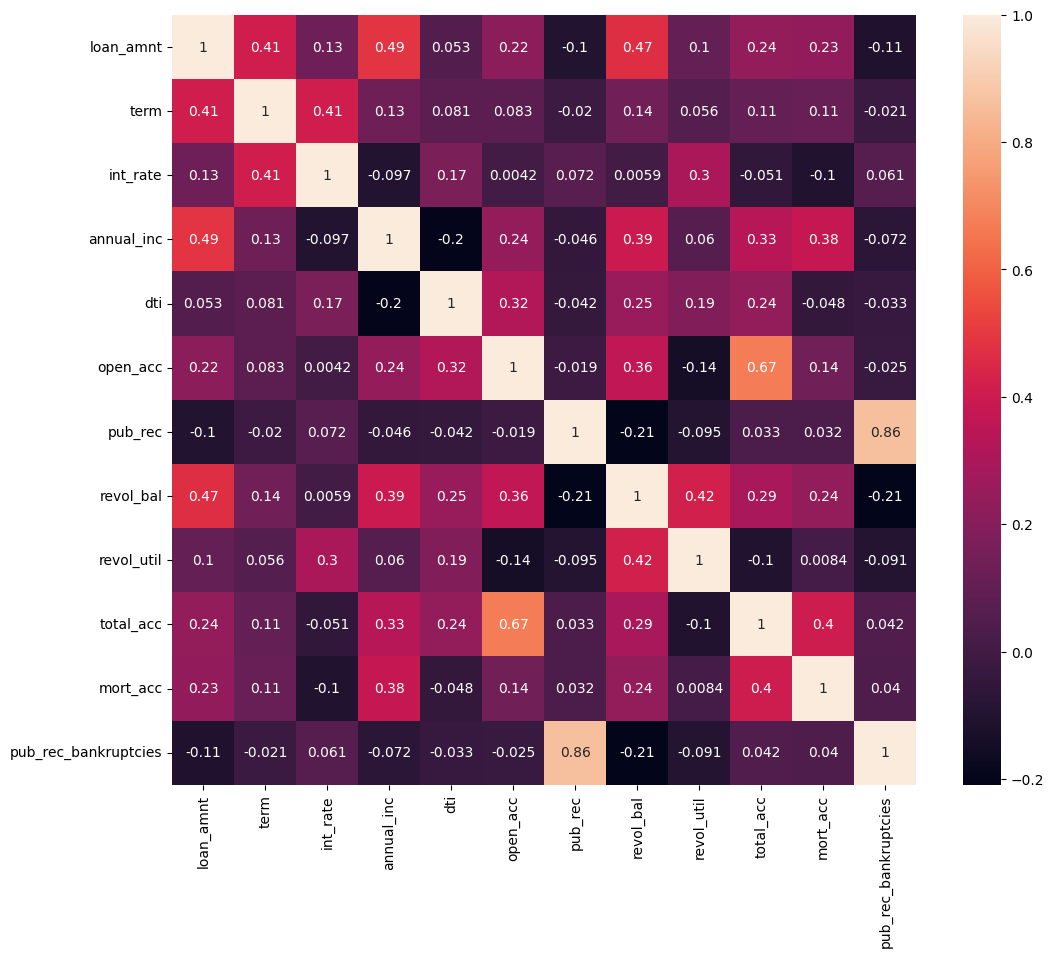

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot = True)

plt.show()

In [ ]:
num_vars = df.select_dtypes(['float64','int64']).columns.tolist()

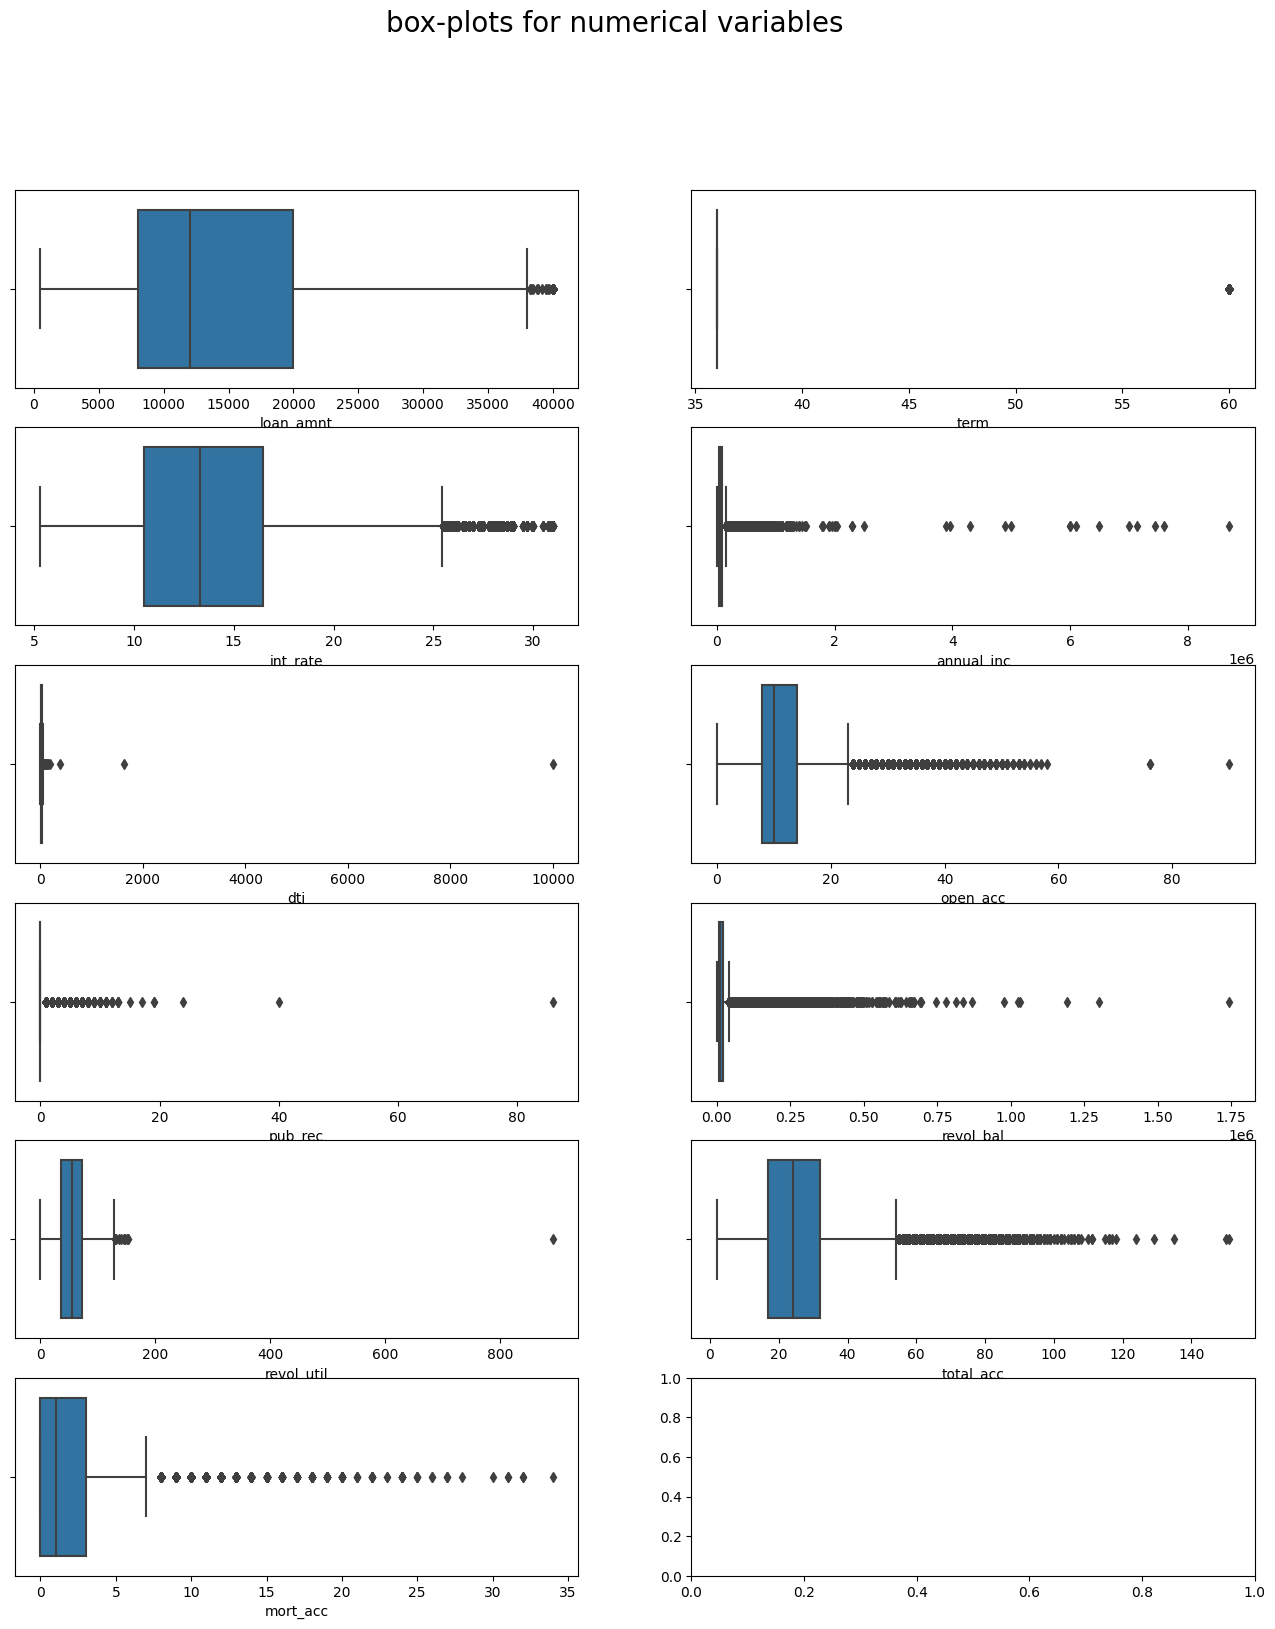

In [ ]:
count, nrows, ncols = 0,6,2

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,18))

for i in range(nrows):
  for j in range(ncols):
    if count <11 :
      sns.boxplot(data= df , x= num_vars[count] , ax= axis[i, j])
      count+=1

plt.suptitle("box-plots for numerical variables", fontsize=20)
plt.show()


## **Data Preprocessing**

### **Duplicate value check, Missing value treatment, Outlier treatment and Feature engineering**

In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.isnull().sum()/ len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
zip_code                0.000000
dtype: float64

In [ ]:
total_acc_avg= df.groupby(by='total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc_null(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
df['mort_acc']= df.apply(lambda y: fill_mort_acc_null(y['total_acc'],y['mort_acc']),axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
(df.isna().sum()/ len(df))*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
zip_code                0.0
dtype: float64

### **Outliers Treatment**

### **"In this observation, it becomes apparent that numerous columns contain outliers.**

 To address this, we will eliminate rows containing outliers, employing standard deviation (considering that 99% of data falls within 3 standard deviations in the case of a normally distributed dataset)."

###**Note : Using IQR method to eliminate Outliers are leading to over a lakh data-loss**

In [ ]:
for col in num_vars:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

In [ ]:
df.shape

(342258, 27)

In [ ]:
def pub_rec(x):
    if x == 0.0:
        return 0
    else:
        return 1

def mort_acc(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x


def pub_rec_bankruptcies(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x

In [ ]:
df['pub_rec']=df['pub_rec'].apply(pub_rec)
df['mort_acc']=df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

In [ ]:
df["initial_list_status"] = np.where(df["initial_list_status"]== "w",0,1)

In [ ]:
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [ ]:
df['issue_month'] = df['issue_d'].apply(lambda x : str(x).split('-')[0])
df['issue_year'] = df['issue_d'].apply(lambda x : str(x).split('-')[1])

In [ ]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x : str(x).split('-')[0])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x : str(x).split('-')[1])

In [ ]:
for i in df.columns:
  print(i, '---', df[i].nunique())

loan_amnt --- 1385
term --- 2
int_rate --- 502
grade --- 7
sub_grade --- 35
emp_title --- 162754
emp_length --- 11
home_ownership --- 4
annual_inc --- 22091
verification_status --- 3
issue_d --- 111
loan_status --- 2
purpose --- 14
title --- 36984
dti --- 4036
earliest_cr_line --- 656
open_acc --- 26
pub_rec --- 2
revol_bal --- 47869
revol_util --- 1195
total_acc --- 58
initial_list_status --- 2
application_type --- 3
mort_acc --- 2
pub_rec_bankruptcies --- 2
address --- 340508
zip_code --- 10
issue_month --- 10
issue_year --- 12
earliest_cr_line_month --- 64
earliest_cr_line_year --- 12


In [ ]:
categorical_columns=  ['emp_length','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','initial_list_status','application_type']


### **Data preparation for modeling**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['emp_length'] = label_encoder.fit_transform(df['emp_length'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
df['application_type'] = label_encoder.fit_transform(df['application_type'])
df['issue_month'] = label_encoder.fit_transform(df['issue_month'])
df['issue_year'] = label_encoder.fit_transform(df['issue_year'])

In [ ]:
df.shape

(342258, 31)

In [ ]:
df_temp = pd.DataFrame({'emp_title' : df['emp_title'], 'target' : df['loan_status']})
target_mean = df_temp.groupby(by=['emp_title'])['target'].mean()
df['emp_title'] = df_temp['emp_title'].map(target_mean)

In [ ]:
data =  df[['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code', 'issue_month',
       'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year']]

In [ ]:
x=data
y=df["loan_status"]
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(239580, 26) (239580,)
(102678, 26) (102678,)


In [ ]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

## **Model building**

### **Build the Logistic Regression model and comment on the model statistics**

In [ ]:
model = LogisticRegression(max_iter= 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print('Accuracy of Logistic Regression Classifier on train set: {:.3f}'.format(model.score(x_train, y_train)))

Accuracy of Logistic Regression Classifier on train set: 0.912


In [ ]:
y_predicted = model.predict(x_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.909


In [ ]:
np.unique(y_predicted, return_counts=1)

(array([0, 1]), array([87591, 15087]))

In [ ]:
np.unique(y_test, return_counts=1)

(array([0, 1]), array([82886, 19792]))

### **Display model coefficients with column names**

In [ ]:
pd.Series((zip(x.columns, model.coef_[0])))

0                    (loan_amnt, 0.6332097861251708)
1                        (term, 0.46011587887181343)
2                     (int_rate, -1.445843155813727)
3                      (grade, -0.08915995219963774)
4                    (sub_grade, 3.9229831715066625)
5                     (emp_title, 8.930682923027515)
6                  (emp_length, 0.09934279307628438)
7               (home_ownership, 0.2620934795307025)
8                 (annual_inc, -0.08277386700722497)
9         (verification_status, 0.06895359378790902)
10                    (purpose, 0.04225372992608276)
11                         (dti, 1.0170473180896067)
12                    (open_acc, 0.8777850948203753)
13                    (pub_rec, 0.11616086486985337)
14                 (revol_bal, -0.41456174724621125)
15                  (revol_util, 0.7367589760681804)
16                  (total_acc, -0.5056096803396302)
17        (initial_list_status, 0.07466062752460878)
18           (application_type, -1.02318558889

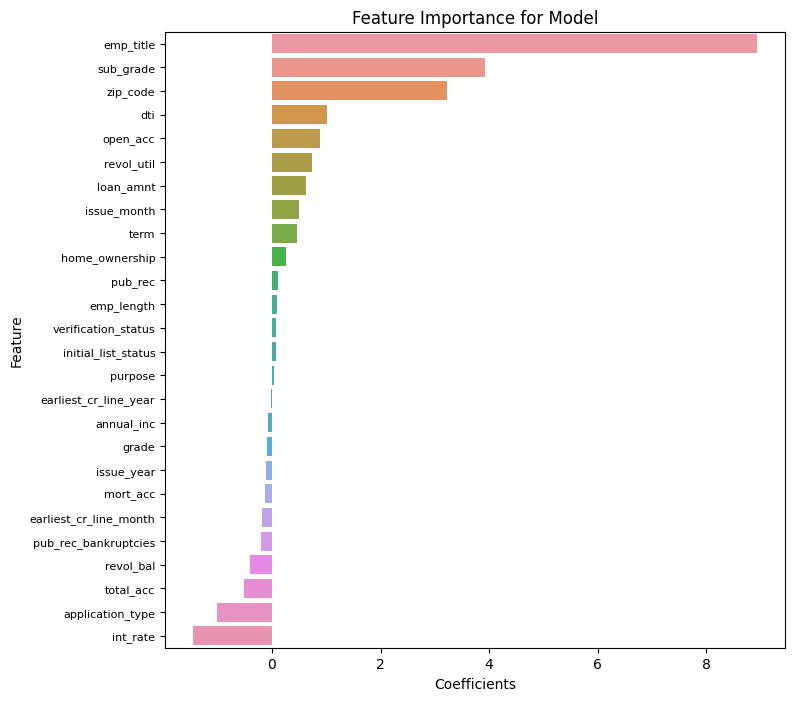

In [ ]:
feature_importance = pd.DataFrame({'Columns':data.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_importance['Columns'],
           x =  feature_importance['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.show()

### **Classification Report, Precision Recall Curve & comments and ROC AUC Curve & comments**

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     82886
           1       0.85      0.65      0.73     19792

    accuracy                           0.91    102678
   macro avg       0.88      0.81      0.84    102678
weighted avg       0.91      0.91      0.90    102678



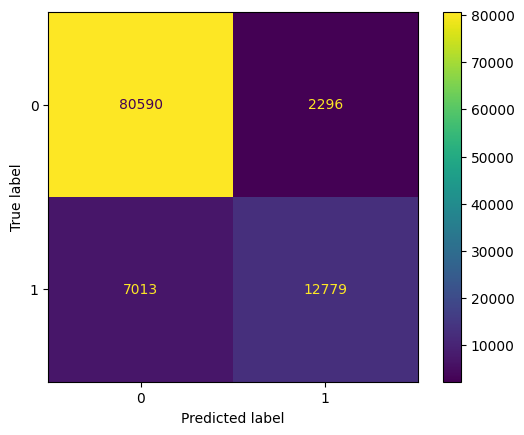

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, y_predicted)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=model.classes_).plot()

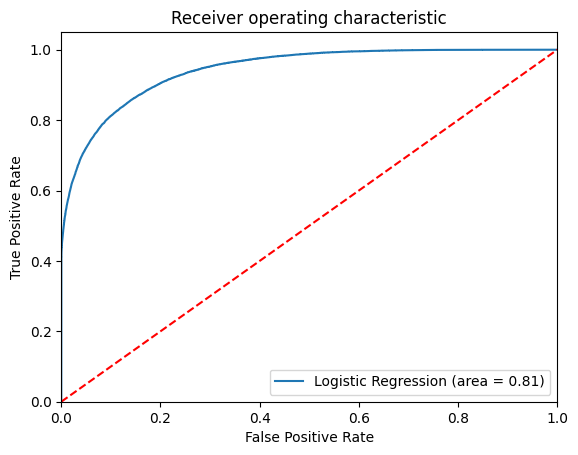

In [ ]:
logit_roc_auc=roc_auc_score(y_test,model.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

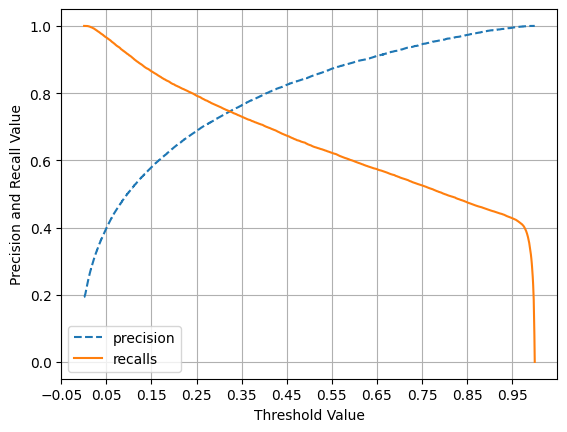

In [ ]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model.predict_proba(x_test)[:,1])

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train, columns=data.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,sub_grade,167.33
18,application_type,127.70
2,int_rate,98.96
3,grade,63.37
24,earliest_cr_line_month,60.05
22,issue_month,31.60
12,open_acc,11.97
16,total_acc,11.35
15,revol_util,9.25
11,dti,8.31


In [ ]:
data =  df[['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code', 'issue_month',
       'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year']]

In [ ]:
data.drop(columns=['loan_amnt','sub_grade', 'application_type', 'int_rate', 'earliest_cr_line_month', 'issue_month', 'open_acc'],axis=1,inplace=True)


<ipython-input-127-6c61955d88a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['loan_amnt','sub_grade', 'application_type', 'int_rate', 'earliest_cr_line_month', 'issue_month', 'open_acc'],axis=1,inplace=True)


In [ ]:
x= data
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

model = LogisticRegression(max_iter= 1000)
model.fit(x_train, y_train)

print('Accuracy of Logistic Regression Classifier on train set: {:.3f}'.format(model.score(x_train, y_train)))

y_predicted = model.predict(x_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(x_test, y_test)))


vif = pd.DataFrame()
X_t = pd.DataFrame(x_train, columns=data.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Accuracy of Logistic Regression Classifier on train set: 0.911
Accuracy of Logistic Regression Classifier on test set: 0.909


,Features,VIF
11,revol_util,7.51
12,total_acc,7.03
8,dti,6.99
5,annual_inc,5.81
9,pub_rec,5.48
15,pub_rec_bankruptcies,5.32
1,grade,4.61
14,mort_acc,4.20
10,revol_bal,4.12
18,earliest_cr_line_year,3.54


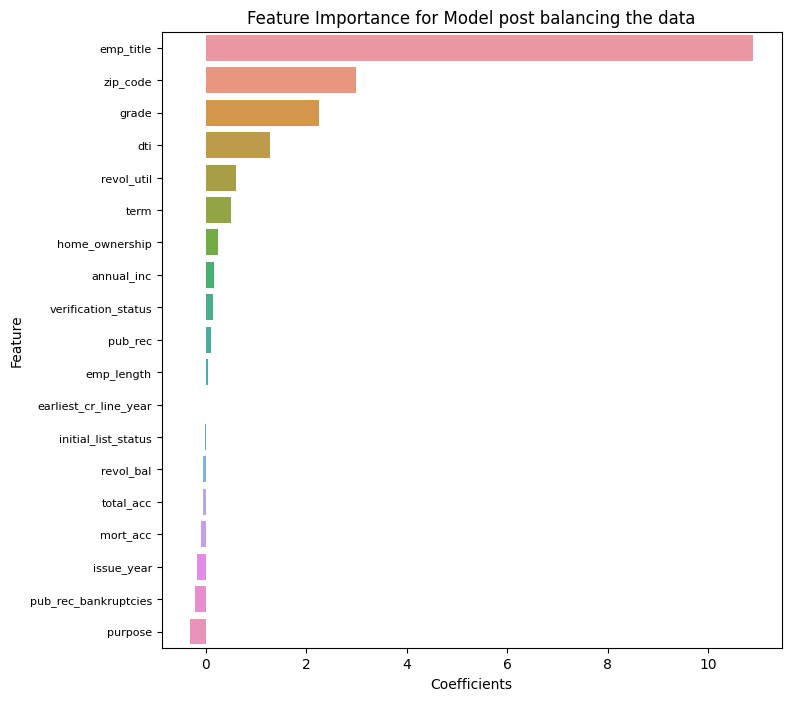

In [ ]:
feature_importance = pd.DataFrame({'Columns':data.columns, 'Coefficients':model2.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_importance['Columns'],
           x =  feature_importance['Coefficients'])
plt.title("Feature Importance for Model post balancing the data")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.show()

## **Observations:**


The model has assigned large weightage to emp_title features followed by zipcode and grade.

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     82886
           1       0.85      0.65      0.73     19792

    accuracy                           0.91    102678
   macro avg       0.88      0.81      0.84    102678
weighted avg       0.91      0.91      0.90    102678



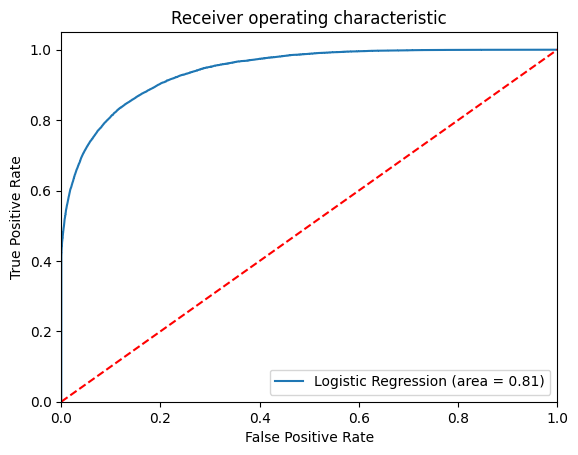

In [ ]:
logit_roc_auc=roc_auc_score(y_test,model.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

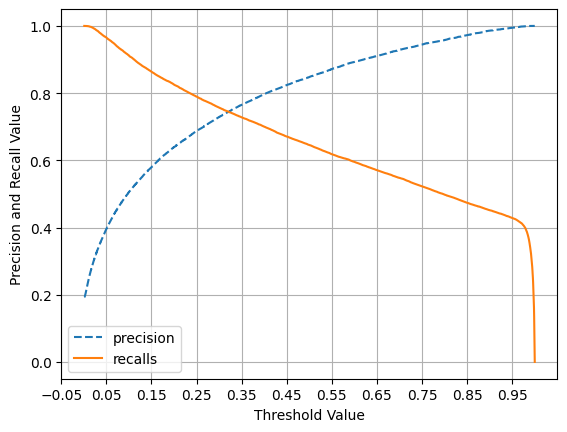

In [ ]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model.predict_proba(x_test)[:,1])

In [ ]:
sm=SMOTE(random_state=42)
X_train_smote,y_train_smote=sm.fit_resample(x_train,y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

After OverSampling, the shape of train_X: (386800, 19)
After OverSampling, the shape of train_y: (386800,) 

After OverSampling, counts of label '1': 193400
After OverSampling, counts of label '0': 193400


In [ ]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_smote, y_train_smote)
predictions = model2.predict(x_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     82886
           1       0.62      0.84      0.71     19792

    accuracy                           0.87    102678
   macro avg       0.79      0.86      0.81    102678
weighted avg       0.89      0.87      0.88    102678



### **Observations:**


* After balancing the data, we see that the recall and precision for "defaulters" stands at 84% and 62% accordingly.

* Our model is able to effectively reduce NPAs by flagging most of the defaulters,but it will also cause company to deny loans to many deserving customers due to low precision.

* Low precision has also caused F1 score to drop to 60% even though accuracy is 87%



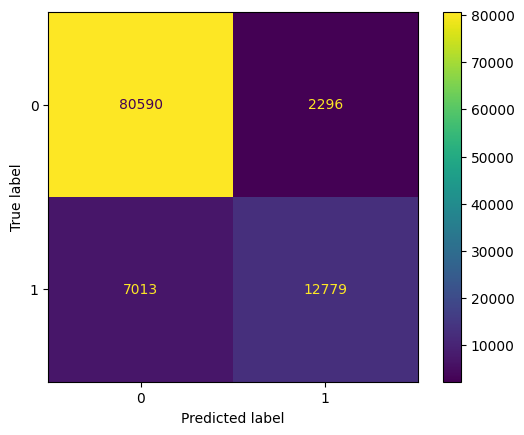

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, y_predicted)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=model2.classes_).plot()

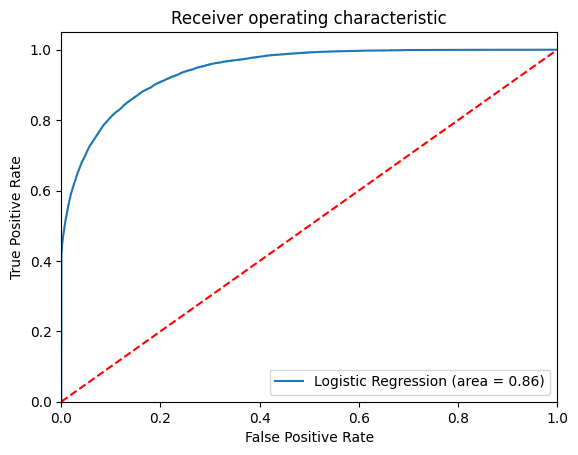

In [ ]:
logit_roc_auc=roc_auc_score(y_test,model2.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_test,model2.predict_proba(x_test)[:,1])


0.9431178482017095

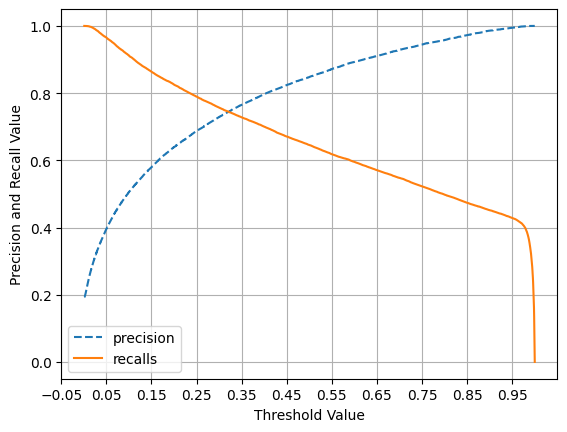

In [ ]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model.predict_proba(x_test)[:,1])

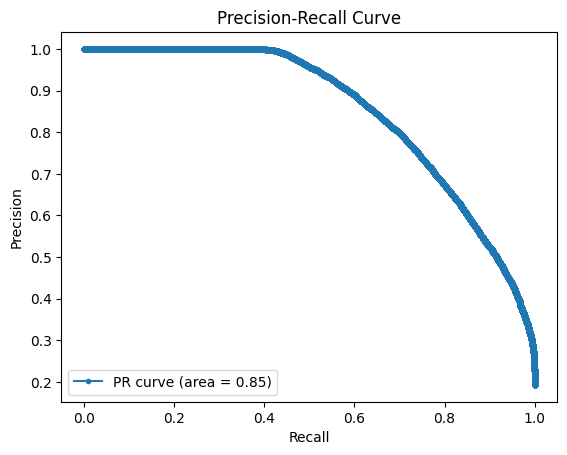

In [ ]:
probs = model.predict_proba(x_test)[:,1]


precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
auc(recall, precision)


0.8509140384058732

## **Tradeoff Questions**

**1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

Ans : Given the imbalance in the dataset, rectifying this imbalance could help mitigate the occurrence of false positives. In assessing model performance, particular attention should be directed toward the macro average F1-score. This choice is motivated by the desire to minimize false positive predictions while effectively identifying instances of default.


**2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone**

Ans : The recall score serves as an indicator of the model's capability to identify actual defaulters. Elevating the recall score is instrumental in mitigating false negatives (Type 2 errors), thereby ensuring that loans are not extended to individuals at risk of default.

# **Actionable Insights & Recommendations**


1. **Overview of Customer Loan Status:**
   - 80% of the customers have successfully repaid their loans.
   - 20% of the customers are classified as defaulters.

2. **Utilizing the Trained Model:**
   - The organization can employ the trained model to predict whether an individual is likely to fully repay the loan or become a defaulter.

3. **Model Performance Metrics:**
   - The model achieves a 92% F1-score for the negative class (Fully Paid).
   - For the positive class (Charged Off), the model achieves a 72% F1-score.

4. **Cross-Validation and Testing Accuracy:**
   - Cross-validation accuracy and testing accuracy are nearly identical, indicating the model performs consistently well.
   - This consistency suggests the model can be trusted for making predictions on unseen data.

5. **Improving Model Performance:**
   - To enhance the model's performance, options include collecting more data, employing a more complex model, or tuning hyperparameters.

6. **ROC AUC Curve Analysis:**
   - The model's ROC AUC curve area is 0.92, signifying correct classification of about 73% of instances.
   - While this performance is commendable, there is still potential for improvement.

7. **Precision-Recall Curve Insights:**
   - The precision-recall curve illustrates the trade-off between precision and recall based on varying thresholds.
   - The optimal point on the curve is determined by the specific needs of the application.

8. **Effect of Balancing the Dataset:**
   - After balancing the dataset, there is a noticeable impact on precision and recall scores for both classes.

9. **Accuracy of Logistic Regression Classifier:**
   - The accuracy of the Logistic Regression Classifier on the test set is 0.92 , indicating a respectable performance that is not attributable to chance.

## **Recommendations:**

1. In comparison to logistic regression, employing more intricate classifiers such as random forest is advantageous, as they are not constrained by the linearity of the decision boundary. This flexibility enables them to potentially yield superior results in the given context.

2. The optimal approach to attain the goal of balancing the risk associated with increasing Non-Performing Assets (NPAs), while simultaneously capitalizing on the opportunity to earn interest by extending loans to creditworthy customers, involves maximizing the F1 score and the area under the Precision-Recall Curve. This strategy allows for a nuanced precision-recall trade-off.



## **Questionnaire:**


### **What percentage of customers have fully paid their Loan Amount? :**
- ** 80%**


### **Comment about the correlation between Loan Amount and Installment features.**
- loan amount and installements are highly correlated having spearman correlation of 97%

### **The majority of people have home ownership as**
- Mortage, followed by Rent and Own houses

### **People with grades ‘A’ are more likely to fully pay their loan. (T/F) :**

### **Name the top 2 afforded job titles.**
- Teacher and Manager

### **Thinking from a bank's perspective, which metric should our primary focus be on..ROC AUC, Precision, Recall and F1 Score**
- Recall :  Recall is crucial when the cost of false negatives (missing a fraudulent application) is high. High recall ensures that the model identifies a significant portion of fraudulent cases.

### **How does the gap in precision and recall affect the bank?**
-The gap between precision and recall in logistic regression impacts the bank's ability to make informed lending decisions. Striking an appropriate balance between precision and recall is crucial for managing the trade-off between approving loans to creditworthy customers and mitigating the risk of defaults. The specific impact depends on the bank's priorities, objectives, and risk management strategy.

###**Which were the features that heavily affected the outcome?**
- grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters

###**Will the results be affected by geographical location? (Yes/No)**
- Yes, Zip codes such as 11650, 86630 and 93700 have 100% defaulters